# k-ближайщих соседей

## Лабораторная работа №1


---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Сильченко Алексей Евгеньевич   

Группа: 201-361

Вариант: Вариант 1

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/knn-1.csv
1. http://labcolor.space/knn-2.csv
1. http://labcolor.space/knn-3.csv

Скопируйте ссылку для своего варианта.

### Импортирование модулей для выполнения работы

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

Загружаем данные и после выполнения ячейки в выводе должны быть показаны названия столбцов и первые 5 элементов.

In [4]:
df = pd.read_csv("knn-1.csv", dtype={'target':'category'})  # вставьте в виде строки ссылку в read_csv для загрузки данных
df.head()

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,target
0,0.233642,-2.856991,-1.124470,1.047026,1.698498,2.205668,5.688430,0.777971,0.838324,-2.730563,2
1,0.930962,-0.848639,-0.914931,0.186634,0.390449,0.761296,1.047490,1.416395,-1.889859,-0.787294,2
2,3.039598,-3.609094,1.297023,-4.875627,-1.214941,0.141744,-1.357529,1.733144,0.413580,2.701917,5
3,-1.316270,3.443701,-0.054570,-3.700956,-2.431620,1.272358,-3.461576,1.079258,-1.252379,-1.932743,4
4,-0.679801,0.463895,-0.171315,-1.476226,0.703294,-0.955350,-2.170080,0.930076,0.076539,1.298095,1


В слудующих двух ячейках выведется статистика по вашим данным.

In [5]:
df.describe(include='number')

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.071647,-0.033323,-0.070729,-0.165015,0.489056,-0.038457,-0.176141,0.157823,0.011901,0.188988
std,1.882340,1.976146,1.998412,1.969760,1.851486,1.834454,2.511457,3.862871,1.979822,1.778872
min,-5.856612,-6.035980,-7.409478,-6.263850,-5.561504,-7.376715,-8.857109,-11.145410,-6.403031,-5.415565
25%,-1.113012,-1.372909,-1.406289,-1.482332,-0.610556,-1.176715,-1.925499,-2.454186,-1.307162,-0.971578
50%,0.155191,-0.076731,-0.018896,-0.184553,0.643021,-0.011929,-0.007326,-0.071261,-0.027646,0.150210
75%,1.420308,1.361499,1.285955,1.171635,1.694812,1.263112,1.454744,2.595112,1.255757,1.375263
max,6.377722,6.547105,6.208213,5.383358,5.236315,4.793406,7.191294,13.154079,6.185867,5.676245


**Сколько объектов есть в вашем наборе данных?**

Ответ: 5

**Сколько признаков у ваших объектов?**

Ответ: 10

In [6]:
df.describe(include='category')

,target
count,1000
unique,6
top,1
freq,169


**Сколько классов в вашем целевом признаке?**

Ответ: 6, т.к. unique = 6


Теперь оценим распределение по классам

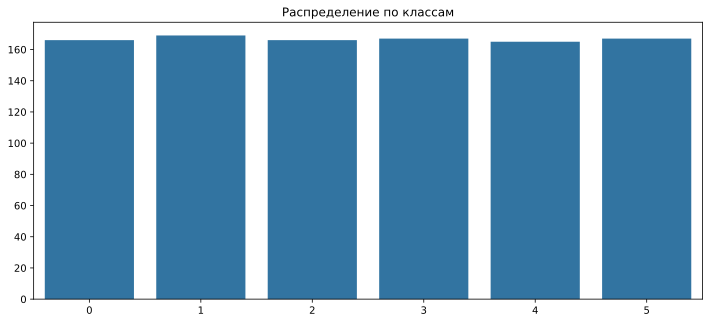

In [7]:
labels, counts = np.unique(df['target'], return_counts=True)
fig, axs = plt.subplots(ncols=1)
sns.barplot(x=[str(label) for label in labels], y=counts, ax=axs).set_title("Распределение по классам")
plt.show()

**Равномерное ли у вас распреденеие по классам?**

Ответ: примерно да

## Подготовка данных для работы с моделью

Разделим наши признаки и метки классов.

In [8]:
y = df.pop('target')
X = df

Далее используя метод `train_test_split()` разделите данные на обучающую и проверочную части. В тестовую часть выделите 15% ваши данных и укажите random_state для воспроизводимости вашего результата.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

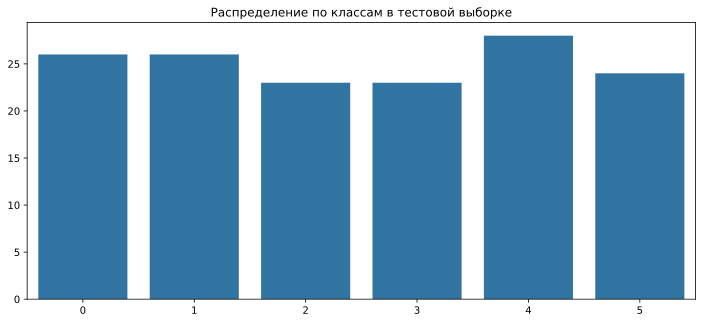

In [10]:
labels, counts = np.unique(y_test, return_counts=True)
fig, axs = plt.subplots(ncols=1)
sns.barplot(x=[str(label) for label in labels], y=counts, ax=axs).set_title("Распределение по классам в тестовой выборке")
plt.show()

**Равномерное ли у вас распреденеие по классам в тестовой выборке и каким оно должно быть в идеальном случае?**

Ответ: нет


Стандартизация признаков путем вычитания среднего значения и масштабирования до единичной дисперсии.

In [11]:
scaler = StandardScaler()

Используя объект `scaler` вычислите среднее и стандартное отклонение для последующего масштабирования признаков с помощью метода `fit`.

С помощью метода `transform` преобразуйте ваши данные и сохраните их в новые переменные.

In [15]:
# scaler.fit()
# scaler.transform()

# Вычисление среднего и стандартного отклонения
scaler.fit(X_train)

# Масштабирование обучающего набора данных
X_train_scaled = scaler.transform(X_train)

# Масштабирование тестового набора данных
X_test_scaled = scaler.transform(X_test)

**Для чего требуется предобработка данных?**

Ответ: улучшение качества данных, повышение эффекивности алгоритмов, обработка пропущенных значений, обнаружение и удаление выбрасов

## Создание и обучение классификатора

Создайте классификатор knn указав аргументы:
- n_neighbors - количество соседей
- metric - способ засчета расстояний между объектами
- algorithm - оставляйте 'brute'

In [52]:
clf = KNeighborsClassifier(n_neighbors=14, metric='euclidean', algorithm='brute')

С помощью метода fit для объекта обучите вашу модель, для обучения используйте предобработанные данные.

In [53]:
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=14)

## Оценка модели

Проверьте результат работы вашей модели используя медот `score` классификатора, передав в него тестовую часть ваших данных.

In [54]:
clf.score(X_test_scaled, y_test)

0.7533333333333333

**Что значит данное число?**

Ответ: 
Точность - это доля правильных предсказаний от общего числа сделанных предсказаний. 
Чем выше точность тем лучше модель справляется с задачей классификации на тестовых данных, правильно классифицируя большинство образцов.

Для построения матрицы ошибок, замените комментарии на ваши переменные.

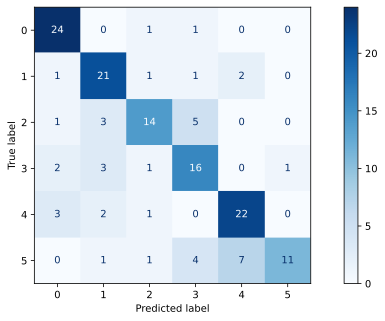

In [21]:
ConfusionMatrixDisplay.from_estimator(
    # Объект вашего классификатора,
    clf,
    # множество тестовых объектов,
    X_test_scaled,
    # множество тестовых меток классов,
    y_test,
    display_labels=np.unique(y),
    cmap=plt.cm.Blues,
    normalize=None,
)

**Что показывает матрица ошибок?**

Ответ: Матрица ошибок показываеи, какие классы были правильно классифицированы, а какие нет, предоставляя более детальный анализ производительности модели по сравнению с простым показателем точности.

Вернитесь в раздел "Создание и обучение классификатора" и попробуйте другие варианты параметров для модели k-ближайших соседей (количество соседей и метрик)

**Итоговые результаты**

Максимальная оценка вашей модели (score): 0,75

Параметры лучшей модели:

- количество соседей: 14 
- метрика: euclidean

## Контрольные вопросы

**Опишите алгоритм работы метода k-ближайших соседей.**

Ответ: 
1. Выбор количества соседий(k)
2. Рассчет растояния
Алгоритм сначала вычисляет расстояние от нового образца или для которого требуется сделать предсказание до каждого из образцов в обучающем наборе данных.
3. Определение Ближайших Соседей
4. Голосование или Усреднение для Принятия Решения:
Для классификации: Алгоритм применяет "голосование большинства" среди k ближайших соседей. Каждый сосед "голосует" за свой класс, и класс, получивший наибольшее количество голосов, назначается новому образцу.
Для регрессии: Алгоритм обычно вычисляет среднее (или медиану) значений целевой переменной среди k ближайших соседей и использует это значение в качестве предсказания для нового образца.
5. Результат
Новый образец классифицируется на основе наиболее часто встречающегося класса среди его ближайших соседей или получает предсказанное значение на основе среднего (или медианы) его соседей.

**Чем отличаются l1 и l2 метрики?**

Ответ:Метрики L1 и L2 относятся к разным способам измерения расстояния между двумя точками в пространстве признаков и используются в различных алгоритмах машинного обучения. L1 метрика измеряет расстояние как сумму абсолютных разностей между координатами двух точек. L2 метрика измеряет расстояние как квадратный корень из суммы квадратов разностей между координатами.